In [1]:
import json
import re

# import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
user = "AndreaBe99"
repo = "computer-network-performance-project"
json_file = "ping_list.json"

for i in range(2,5):
  url = f"https://raw.githubusercontent.com/{user}/{repo}/main/test/plot-{i}/plot{i}_{json_file}"
  !wget --no-cache --backups=1 {url}

--2022-09-16 14:27:33--  https://raw.githubusercontent.com/AndreaBe99/computer-network-performance-project/main/test/plot-2/plot2_ping_list.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177204 (173K) [text/plain]
Failed to rename plot2_ping_list.json to plot2_ping_list.json.1: (2) No such file or directory
Saving to: ‘plot2_ping_list.json’

plot2_ping_list.jso 100%[===================>] 173.05K  --.-KB/s    in 0.02s   

2022-09-16 14:27:34 (10.5 MB/s) - ‘plot2_ping_list.json’ saved [177204/177204]

--2022-09-16 14:27:34--  https://raw.githubusercontent.com/AndreaBe99/computer-network-performance-project/main/test/plot-3/plot3_ping_list.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110

In [123]:
filename = "plot2_ping_list.json"
with open(filename, "r") as read_file:
    data = json.load(read_file)

print(data)

{'2022-09-16 13:13:48.363': {'Timestamp': '2022-09-16 13:13:48.363', 'Rtt': {'min': '44.489', 'avg': '44.489', 'max': '44.489', 'mdev': '0.000 '}}, '2022-09-16 13:13:49.372': {'Timestamp': '2022-09-16 13:13:49.372', 'Rtt': {'min': '44.519', 'avg': '44.519', 'max': '44.519', 'mdev': '0.000 '}}, '2022-09-16 13:13:50.394': {'Timestamp': '2022-09-16 13:13:50.394', 'Rtt': {'min': '67.327', 'avg': '67.327', 'max': '67.327', 'mdev': '0.000 '}}, '2022-09-16 13:13:51.383': {'Timestamp': '2022-09-16 13:13:51.383', 'Rtt': {'min': '45.493', 'avg': '45.493', 'max': '45.493', 'mdev': '0.000 '}}, '2022-09-16 13:13:52.383': {'Timestamp': '2022-09-16 13:13:52.383', 'Rtt': {'min': '44.535', 'avg': '44.535', 'max': '44.535', 'mdev': '0.000 '}}, '2022-09-16 13:13:53.386': {'Timestamp': '2022-09-16 13:13:53.386', 'Rtt': {'min': '44.727', 'avg': '44.727', 'max': '44.727', 'mdev': '0.000 '}}, '2022-09-16 13:13:54.391': {'Timestamp': '2022-09-16 13:13:54.391', 'Rtt': {'min': '46.317', 'avg': '46.317', 'max': 

In [124]:
ping_list = []
for ping in data:
  tstamp = data[ping]["Timestamp"]
  min_rtt = data[ping]["Rtt"]["min"]
  avg_rtt = data[ping]["Rtt"]["avg"]
  max_rtt = data[ping]["Rtt"]["max"]
  mdev_rtt = data[ping]["Rtt"]["mdev"]
  ping_list.append([min_rtt, avg_rtt, max_rtt, mdev_rtt, tstamp])

print(ping_list)

[['44.489', '44.489', '44.489', '0.000 ', '2022-09-16 13:13:48.363'], ['44.519', '44.519', '44.519', '0.000 ', '2022-09-16 13:13:49.372'], ['67.327', '67.327', '67.327', '0.000 ', '2022-09-16 13:13:50.394'], ['45.493', '45.493', '45.493', '0.000 ', '2022-09-16 13:13:51.383'], ['44.535', '44.535', '44.535', '0.000 ', '2022-09-16 13:13:52.383'], ['44.727', '44.727', '44.727', '0.000 ', '2022-09-16 13:13:53.386'], ['46.317', '46.317', '46.317', '0.000 ', '2022-09-16 13:13:54.391'], ['44.525', '44.525', '44.525', '0.000 ', '2022-09-16 13:13:55.391'], ['45.494', '45.494', '45.494', '0.000 ', '2022-09-16 13:13:56.390'], ['44.233', '44.233', '44.233', '0.000 ', '2022-09-16 13:13:57.389'], ['121.693', '121.693', '121.693', '0.000 ', '2022-09-16 13:13:58.468'], ['44.532', '44.532', '44.532', '0.000 ', '2022-09-16 13:13:59.395'], ['44.541', '44.541', '44.541', '0.000 ', '2022-09-16 13:14:00.398'], ['44.611', '44.611', '44.611', '0.000 ', '2022-09-16 13:14:01.400'], ['44.769', '44.769', '44.769',

In [125]:
df = pd.DataFrame(ping_list, columns =['min_rtt', 'avg_rtt', 'max_rtt', 'mdev_rtt', 'Timestamp'])
# Changing the datatype

df["Timestamp"] = df["Timestamp"].astype("datetime64")
df["min_rtt"] = pd.to_numeric(df["min_rtt"])
df["avg_rtt"] = pd.to_numeric(df["avg_rtt"])
df["max_rtt"] = pd.to_numeric(df["max_rtt"])
df["mdev_rtt"] = pd.to_numeric(df["mdev_rtt"])
df["mean_rtt"] = df["avg_rtt"].rolling(20).mean()
df

,min_rtt,avg_rtt,max_rtt,mdev_rtt,Timestamp,mean_rtt
0,44.489,44.489,44.489,0.0,2022-09-16 13:13:48.363,NaN
1,44.519,44.519,44.519,0.0,2022-09-16 13:13:49.372,NaN
2,67.327,67.327,67.327,0.0,2022-09-16 13:13:50.394,NaN
3,45.493,45.493,45.493,0.0,2022-09-16 13:13:51.383,NaN
4,44.535,44.535,44.535,0.0,2022-09-16 13:13:52.383,NaN
...,...,...,...,...,...,...
1195,44.157,44.157,44.157,0.0,2022-09-16 13:33:47.893,67.80480
1196,44.678,44.678,44.678,0.0,2022-09-16 13:33:48.900,67.01200
1197,55.643,55.643,55.643,0.0,2022-09-16 13:33:49.910,60.30470
1198,44.370,44.370,44.370,0.0,2022-09-16 13:33:50.899,55.44065


In [117]:
df.shape

(1200, 6)

Text(0, 0.5, 'Latency')

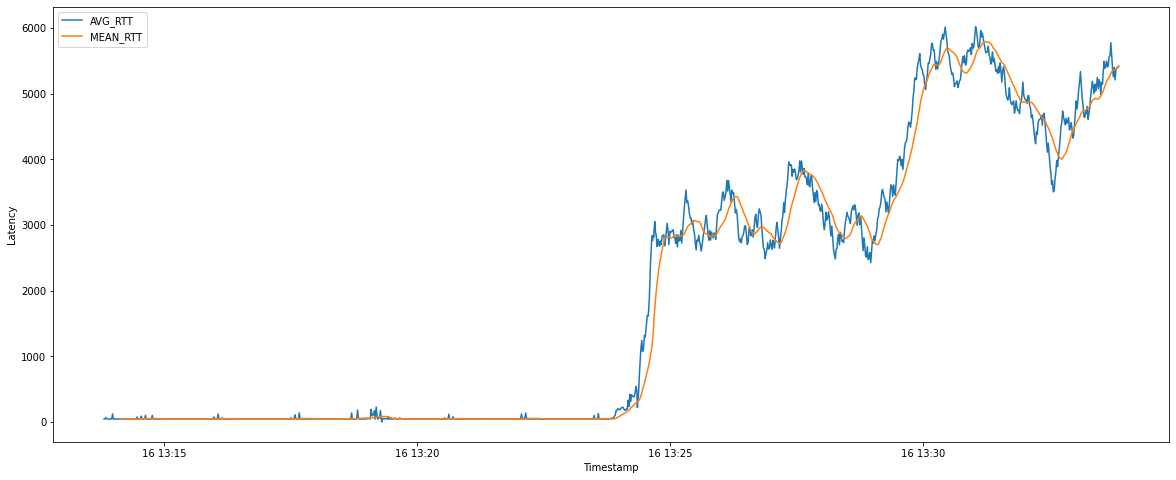

In [121]:
# set figure size
plt.figure( figsize = ( 20, 8))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Timestamp',
             y = 'avg_rtt',
             data = df,
             label = 'AVG_RTT')
  
# plot using rolling average
sns.lineplot( x = 'Timestamp',
             y = 'mean_rtt',
             data = df,
             label = 'MEAN_RTT')
  
plt.xlabel('Timestamp')
plt.ylabel('Latency')